<a href="https://colab.research.google.com/github/DineshDevPandey/Pytorch_basics/blob/master/7_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

## Basic idea of linear regression

**Linear Regression :** LR tries to find a optimal line/ plane/ hyperplane which can best fit the dataset dataset. <br>
Genaral equation of plane is **y = w<sup>T</sup>x + b**

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [144]:
x = torch.tensor([[2], [3]])
print(forward(x))

tensor([[ 7],
        [10]], grad_fn=<AddBackward0>)


## Better Implementation of LR


In [0]:
from torch.nn import Linear

In [146]:
torch.manual_seed(1)

# linear model takes two param num of input , num of output
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [147]:
x = torch.tensor([[3.0], [4.4]])
print(model(x))

tensor([[1.1044],
        [1.8258]], grad_fn=<AddmmBackward>)


## Even better implementation of LR

In [0]:
import torch.nn as nn

# nn.module is a base class for all neural network models

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = self.linear(x)
    return pred
  
  def get_param(self):
    return (self.linear.bias[0].item(), self.linear.weight[0][0].item())
    

In [149]:
torch.manual_seed(1)
model = LR(1, 1)

x = torch.tensor([[3.0], [4.0]])
model.forward(x)

tensor([[1.1044],
        [1.6197]], grad_fn=<AddmmBackward>)

## Create dataset

In [0]:
import matplotlib.pyplot as plt

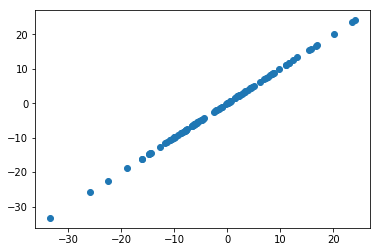

In [151]:
# create 100 points from a normal distribution
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o')

As expected data is appears like a line. Lets add some noice to y values.

Text(0.5, 0, 'X')

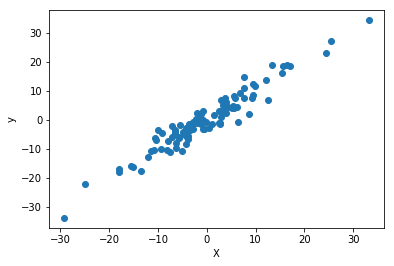

In [152]:
# create 100 points from a normal distribution
X = torch.randn(100, 1) * 10

# add noice to x (data is centered to mean = 0 and var = 1 so multiply it by 3)
y = 3 * torch.randn(100, 1) + X
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('X')

In [153]:
model = LR(1, 1)
model.get_param()

(0.2191758155822754, 0.6112284660339355)

0.2191758155822754
0.6112284660339355


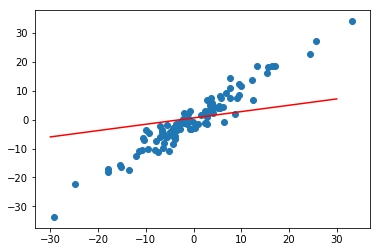

In [155]:
def plot_fit(title):
  plt.title = title
  w1, b1 = model.get_param()
  print(w1)
  print(b1)
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  
  # plot the seperateing line using weight and bias returned by model
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()
  
plot_fit('Initial model')